# 1. Toy model

In [1]:
%load_ext autoreload
%autoreload 2

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pyhf
import cabinetry
import json
import yaml
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

Welcome to JupyROOT 6.26/14


In [2]:
cabinetry.set_logging()

In [3]:
# generate toy sample: gaussian + exponentials
rng = np.random.default_rng(0)

c1_gauss = rng.normal(2, 1, size=1000)
c1_gauss = c1_gauss[(0<c1_gauss) & (c1_gauss<4)]
c2_exp = rng.exponential(scale=2,size=2000)
c2_exp = c2_exp[(0<c2_exp) & (c2_exp<4)]
c3_exp = rng.exponential(scale=3,size=2000)
c3_exp = c3_exp[(0<c3_exp) & (c3_exp<4)]
data = np.append(c1_gauss, np.append(c2_exp, c3_exp))
print(f'{len(c1_gauss)=}')
print(f'{len(c2_exp)=}')
print(f'{len(c3_exp)=}')
print(f'{len(data)=}')

len(c1_gauss)=963
len(c2_exp)=1730
len(c3_exp)=1458
len(data)=4151


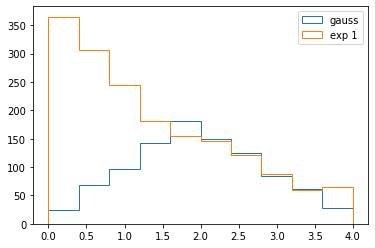

In [6]:
# plot the components
bin1 = np.linspace(0,4,11)
plt.hist(c1_gauss,bins=bin1,label='gauss',histtype='step')
plt.hist(c2_exp,bins=bin1, label='exp 1',histtype='step')
# plt.hist(c3_exp,bins=bin1, label='exp 2',histtype='step')
plt.legend()

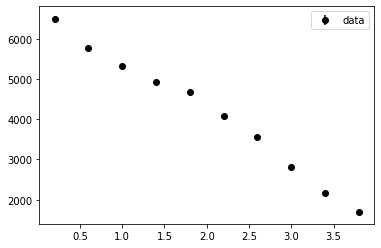

In [68]:
h_data, _ = np.histogram(data, bins=bin1)
bin_centers = 0.5 * (bin1[1:] + bin1[:-1])
plt.errorbar(bin_centers, h_data, h_data**0.5, fmt="ok",label='data')
plt.legend()

In [4]:
import uncertainties.unumpy as unp

In [7]:
# case1: sample 0.1 and histogram 1
frac = 0.5
c1_sub = rng.choice(c1_gauss, size=int(len(c1_gauss)*frac), replace=False,shuffle=True)
c2_sub = rng.choice(c2_exp, size=int(len(c2_exp)*frac), replace=False,shuffle=True)
# c3_sub = rng.choice(c3_exp, size=int(len(c3_exp)*frac), replace=False,shuffle=True)
h1_sub, _ = np.histogram(c1_sub, bins=bin1)
h2_sub, _ = np.histogram(c2_sub, bins=bin1)
# h3_sub, _ = np.histogram(c3_sub, bins=bin1)
# uarray
u1_sub = unp.uarray(h1_sub, np.sqrt(h1_sub).round(2) )
u2_sub = unp.uarray(h2_sub, np.sqrt(h2_sub).round(2) )
# u3_sub = unp.uarray(h3_sub, np.sqrt(h3_sub).round(2) )
# temp dict
dict_case1 = {'gauss': u1_sub, 'exp2': u2_sub,}# 'exp3': u3_sub}
temp_case1 = (dict_case1, np.sum(list(dict_case1.values()), axis=0))

In [8]:
# case2: sample 1 and histogram 0.1
w = 0.5
h1_weighted, _ = np.histogram(c1_gauss, bins=bin1, weights=w*np.ones_like(c1_gauss))
h2_weighted, _ = np.histogram(c2_exp, bins=bin1, weights=w*np.ones_like(c2_exp))
# h3_weighted, _ = np.histogram(c3_exp, bins=bin1, weights=w*np.ones_like(c3_exp))
h1_err2, _ = np.histogram(c1_gauss, bins=bin1, weights=w**2*np.ones_like(c1_gauss))
h2_err2, _ = np.histogram(c2_exp, bins=bin1, weights=w**2*np.ones_like(c2_exp))
# h3_err2, _ = np.histogram(c3_exp, bins=bin1, weights=w**2*np.ones_like(c3_exp))
# uarray
u1_sub = unp.uarray(h1_weighted.round(2), np.sqrt(h1_err2).round(2) )
u2_sub = unp.uarray(h2_weighted.round(2), np.sqrt(h2_err2).round(2) )
# u3_sub = unp.uarray(h3_weighted.round(2), np.sqrt(h3_err2).round(2) )
# temp dict
dict_case2 = {'gauss': u1_sub, 'exp2': u2_sub,}# 'exp3': u3_sub}
temp_case2 = (dict_case2, np.sum(list(dict_case2.values()), axis=0))

In [9]:
# update templates and data in the workspace
# signal region
spec_case1 = util.create_workspace(temp_asimov_channels=[temp_case1],
                               mc_uncer=True,fakeD_uncer=True)
spec_case1['measurements'][0]['config']['poi'] = 'gauss_norm'

print(json.dumps(spec_case1, sort_keys=True, indent=4))

# cabinetry.workspace.save(spec_e, '../Fit_toys/test_1d_case2_noUncer.json')

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        7.0,
                        31.0,
                        48.0,
                        75.0,
                        100.0,
                        73.0,
                        63.0,
                        39.0,
                        32.0,
                        13.0
                    ],
                    "modifiers": [
                        {
                            "data": null,
                            "name": "gauss_norm",
                            "type": "normfactor"
                        },
                        {
                            "data": [
                                2.65,
                                5.57,
                                6.93,
                                8.66,
                                10.0,
                                8.54,
                     

In [10]:
# update templates and data in the workspace
# signal region
spec_case2 = util.create_workspace(temp_asimov_channels=[temp_case2],
                               mc_uncer=True,fakeD_uncer=True)
spec_case2['measurements'][0]['config']['poi'] = 'gauss_norm'

print(json.dumps(spec_case2, sort_keys=True, indent=4))

# cabinetry.workspace.save(spec_e, '../Fit_toys/test_1d_case2_noUncer.json')

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        12.5,
                        34.5,
                        48.0,
                        71.5,
                        90.5,
                        75.0,
                        62.5,
                        42.5,
                        31.0,
                        13.5
                    ],
                    "modifiers": [
                        {
                            "data": null,
                            "name": "gauss_norm",
                            "type": "normfactor"
                        },
                        {
                            "data": [
                                2.5,
                                4.15,
                                4.9,
                                5.98,
                                6.73,
                                6.12,
                       

In [11]:
model_case1, data_case1 = cabinetry.model_utils.model_and_data(spec_case1)
model_case2, data_case2 = cabinetry.model_utils.model_and_data(spec_case2)

toy_pars_case1 = cabinetry.model_utils.asimov_parameters(model_case1)
pdf_toy_case1 = model_case1.make_pdf(pyhf.tensorlib.astensor(toy_pars_case1))
toys_case1 = pdf_toy_case1.sample((2,))

toy_pars_case2 = cabinetry.model_utils.asimov_parameters(model_case2)
pdf_toy_case2 = model_case2.make_pdf(pyhf.tensorlib.astensor(toy_pars_case2))
toys_case2 = pdf_toy_case2.sample((2,))

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier exp2_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier gauss_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier exp2_uncer_ch0 (10 new nuisance parameters)
INFO - pyhf.pdf - adding modifier gauss_uncer_ch0 (10 new nuisance parameters)
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier exp2_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier gauss_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier exp2_uncer_ch0 (10 new nuisance parameters)
INFO - pyhf.pdf - adding modifier gauss_uncer_ch0 (10 new nuisance parameters)


In [57]:
# case1, no MC error, weight 0.1
pyhf.set_backend("jax")
fit_results_case1 = cabinetry.fit.fit(model=model_case1, data=toys_case1[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 57.27                      │         Nfcn = 30, Ngrad = 4         │
│ EDM = 6.07e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [58]:
# case2, no MC error, weight 0.1
pyhf.set_backend("jax")
fit_results_case2 = cabinetry.fit.fit(model=model_case2, data=toys_case2[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 58.02                      │         Nfcn = 29, Ngrad = 3         │
│ EDM = 3.48e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [62]:
# case1, staterror, weight 0.1
pyhf.set_backend("jax")
fit_results_case1 = cabinetry.fit.fit(model=model_case1, data=toys_case1[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.25                      │        Nfcn = 202, Ngrad = 7         │
│ EDM = 3.22e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [63]:
# case2, staterror, weight 0.1
pyhf.set_backend("jax")
fit_results_case2 = cabinetry.fit.fit(model=model_case2, data=toys_case2[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.77                      │        Nfcn = 183, Ngrad = 5         │
│ EDM = 1.75e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [70]:
# case1, shapesys, weight 0.1
pyhf.set_backend("jax")
fit_results_case1 = cabinetry.fit.fit(model=model_case1, data=toys_case1[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 143.5                      │        Nfcn = 473, Ngrad = 11        │
│ EDM = 8.58e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [71]:
# case2, shapesys, weight 0.1
pyhf.set_backend("jax")
fit_results_case2 = cabinetry.fit.fit(model=model_case2, data=toys_case2[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 194.2                      │        Nfcn = 430, Ngrad = 5         │
│ EDM = 9.42e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [12]:
# case1, shapesys, weight 0.5
pyhf.set_backend("jax")
fit_results_case1 = cabinetry.fit.fit(model=model_case1, data=toys_case1[0],goodness_of_fit=True)

WARNING - jax._src.xla_bridge - No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 195.3                      │        Nfcn = 454, Ngrad = 8         │
│ EDM = 0.000124 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │   

In [13]:
# case2, shapesys, weight 0.5
pyhf.set_backend("jax")
fit_results_case2 = cabinetry.fit.fit(model=model_case2, data=toys_case2[0],goodness_of_fit=True)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 212.7                      │        Nfcn = 425, Ngrad = 6         │
│ EDM = 0.000143 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

DEBUG - cabinetry.model_utils - total stdev is [[13.5, 12.3, 11.3, 11.6, 14.8, 13.3, 10.8, 8.66, 6.26, 7.6]]
DEBUG - cabinetry.model_utils - total stdev per channel is [44.8]
INFO - cabinetry.visualize.utils - saving figure as figures/channel_0_postfit.pdf


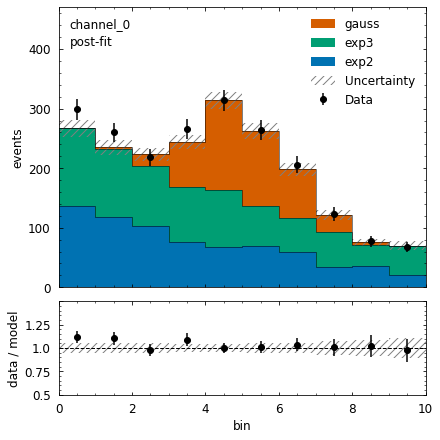

In [15]:
model_pred_postfit = cabinetry.model_utils.prediction(model_case1, fit_results=fit_results_case1)
p = cabinetry.visualize.data_mc(model_pred_postfit, data_case1);

DEBUG - cabinetry.model_utils - total stdev is [[11.9, 9.48, 7.28, 6.8, 11, 10.3, 6.24, 5.17, 5.26, 5.58]]
DEBUG - cabinetry.model_utils - total stdev per channel is [45.5]
INFO - cabinetry.visualize.utils - saving figure as figures/channel_0_postfit.pdf


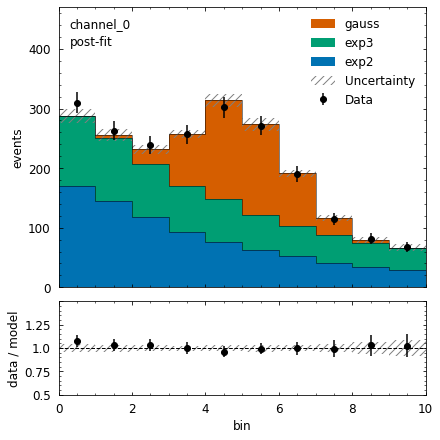

In [16]:
model_pred_postfit = cabinetry.model_utils.prediction(model_case2, fit_results=fit_results_case2)
p = cabinetry.visualize.data_mc(model_pred_postfit, data_case2);

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


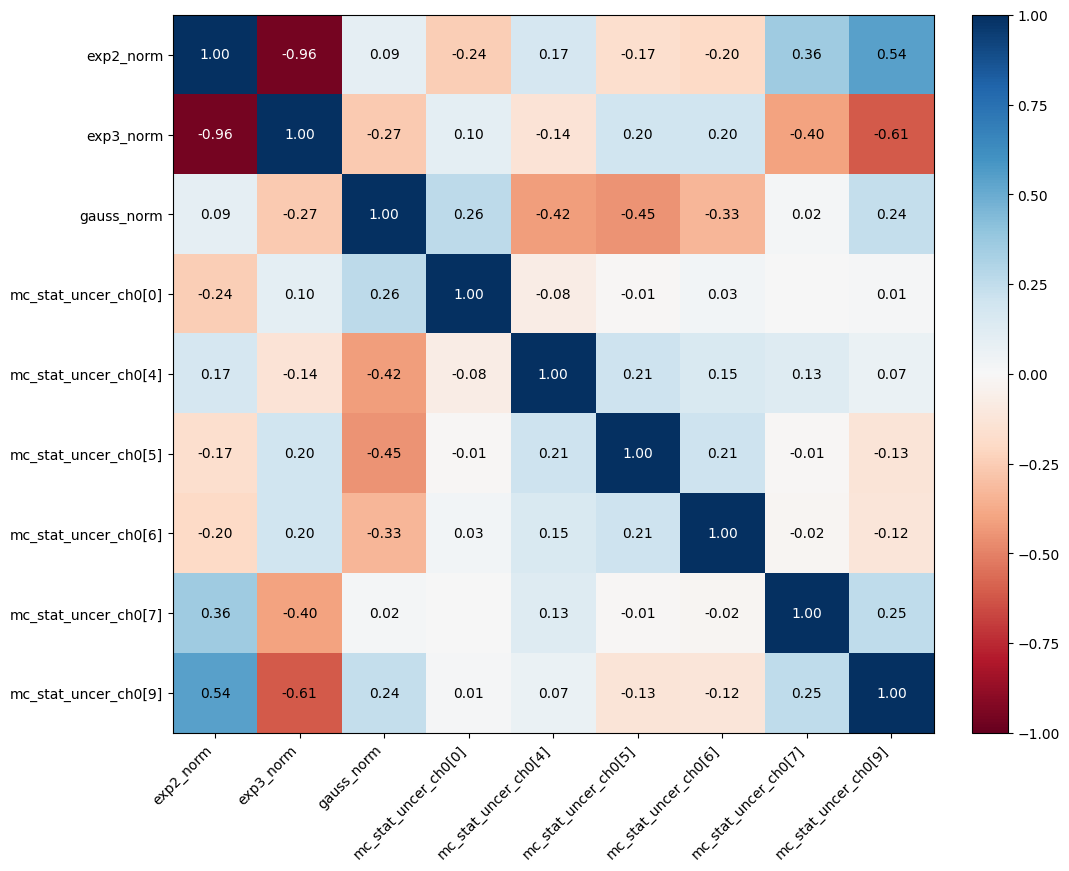

In [19]:
cabinetry.visualize.correlation_matrix(fit_results_case1, pruning_threshold=0.25)

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


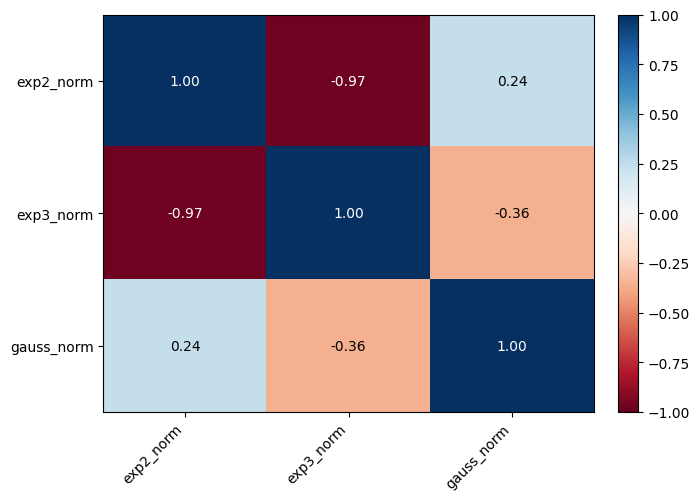

In [21]:
cabinetry.visualize.correlation_matrix(fit_results_case2, pruning_threshold=0.2)

# MC model

In [3]:
# Define the fitting range and number of bins, 'p_D_l'
start = 0.4
end = 4.8
num_bins = 50

# Create the bin edges
p_D_l_bins = np.linspace(start, end, num_bins + 1)
p_D_l_bins = np.concatenate(([0.4, 0.6, 0.8], 
                             np.linspace(1,3,21), 
                             [3.1, 3.2, 3.3, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8]))

# Define the fitting range and number of bins, 'B0_CMS3_weMissM2'
start = -2.5
end = 10
num_bins = 50

# Create the bin edges
MM2_bins = np.linspace(start, end, num_bins + 1)
MM2_bins = np.concatenate((np.linspace(-2.5,2.5,11), np.linspace(2.8,10,19) ) )

In [4]:
# Define relevant variables
training_variables = util.training_variables

## Loading Ntuples
columns = util.all_relevant_variables

cut = '(5<B0_roeMbc_my_mask) & (-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# Load data files
e_generic = uproot.concatenate([f'../Samples/Generic_MC15ri/e_channel/MC15ri_1ab_quaxo_e_2/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

e_sig = uproot.concatenate([f'../Samples/Generic_MC15ri/e_channel/MC15ri_sig_quaxo_e_1/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

In [15]:
df_e_generic = pd.DataFrame(e_generic).sample(frac=1).reset_index(drop=True)
df_e_sig = pd.DataFrame(e_sig)

lgb_tight = 'sig_prob==largest_prob and sig_prob>0.65 and fakeD_prob<0.05'

for df in [df_e_generic,df_e_sig]:
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

df_e_generic_lgb = util.apply_mva_bcs(df_e_generic, training_variables, lgb_tight, library='lgbm')
df_e_sig_lgb = util.apply_mva_bcs(df_e_sig, training_variables, lgb_tight, library='lgbm')



# mu_temp = uproot.concatenate([f'../Samples/Generic_MC15ri/mu_channel/MC15ri_local_200fb/*.root:B0'],
#                           library="np",
#                           #cut=input_cut,
#                           filter_branch=lambda branch: branch.name in columns)

# df_mu = pd.DataFrame(mu_temp)
# df_mu['__weight__'] = 5

# df_mu.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
# df_mu.eval(f'p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

In [16]:
t_e_generic = util.classify_mc_dict(df_e_generic_lgb, 'e', template=False)
t_e_sig = util.classify_mc_dict(df_e_sig_lgb, 'e', template=False)

for name, df in t_e_generic.items():
    print(name, len(df))

bkg_fakeD 47187
bkg_TDFl 6338
bkg_fakeTracks 2637
bkg_continuum 13203
bkg_combinatorial 15124
bkg_singleBbkg 9611
bkg_other_TDTl 0
$D\tau\nu$ 4241
$D^\ast\tau\nu$ 2483
$D\ell\nu$ 90282
$D^\ast\ell\nu$ 57810
$D^{\ast\ast}\tau\nu$ 1472
$D^{\ast\ast}\ell\nu$_narrow 18373
$D^{\ast\ast}\ell\nu$_broad 14110
$D\ell\nu$_gap_pi 3467
$D\ell\nu$_gap_eta 3076
bkg_other_signal 0


In [ ]:
# if use signal MC
for name, df in t_e_sig.items():
    print(name, len(df))

In [138]:
sig_comp = [r'$D\tau\nu$', r'$D^\ast\tau\nu$', r'$D^{\ast\ast}\tau\nu$']
te = {k:v for k,v in t_e_generic.items() if k not in sig_comp}
for c_name in sig_comp:
    te[c_name] = t_e_sig[c_name]
    
for name, df in te.items():
    print(name, len(df))

bkg_fakeD 38152
bkg_TDFl 5089
bkg_fakeTracks 2103
bkg_continuum 10480
bkg_combinatorial 12179
bkg_singleBbkg 7690
bkg_other_TDTl 0
$D\ell\nu$ 72103
$D^\ast\ell\nu$ 46325
$D^{\ast\ast}\ell\nu$_narrow 14671
$D^{\ast\ast}\ell\nu$_broad 11248
$D\ell\nu$_gap_pi 2806
$D\ell\nu$_gap_eta 2446
bkg_other_signal 0
$D\tau\nu$ 18671
$D^\ast\tau\nu$ 9709
$D^{\ast\ast}\tau\nu$ 17312


# 2. Create templates

In [18]:
## luminosity == 1/ab
indices_threshold_e,temp_asimov_e,temp_with_sb,temp_asimov_merged_e = util.create_templates(
    samples=t_e_generic, # te
    bins=[MM2_bins], scale_lumi=1, fakeD_from_sideband=True,
    data = df_e_generic_lgb.query('D_M<1.83 or 1.91<D_M').sample(frac=0.36), # use 360/fb sideband
    variables=['B0_CMS3_weMissM2'], bin_threshold=10,merge_threshold=5,
    sample_to_exclude=['bkg_fakeTracks','bkg_other_TDTl','bkg_other_signal',
#                       r'$D^{\ast\ast}\ell\nu$_broad',
#                       r'$D\ell\nu$_gap_pi',
#                       r'$D\ell\nu$_gap_eta',
#                       r'$D^{\ast\ast}\ell\nu$_narrow',
#                       r'$D\ell\nu$',
#                       r'$D^\ast\ell\nu$',
#                       r'$D\tau\nu$', 
#                       r'$D^\ast\tau\nu$', 
#                       r'$D^{\ast\ast}\tau\nu$','bkg_TDFl',
#                       'bkg_continuum','bkg_combinatorial','bkg_singleBbkg'
                      ],
    sample_weights={r'$D^{\ast\ast}\ell\nu$_broad': 0.36, # 1.46, 13976 events from 1/ab
                    r'$D\ell\nu$_gap_pi':           0.36, # 3435 events 
                    r'$D\ell\nu$_gap_eta':          0.36, # 3047
                    r'$D^{\ast\ast}\ell\nu$_narrow':0.36,
                    r'$D\ell\nu$':                  0.36,
                    r'$D^\ast\ell\nu$':             0.36,
                    r'$D\tau\nu$':                  0.36, # * 4241/18671, 
                    r'$D^\ast\tau\nu$':             0.36, # * 2483/9709, 
                    r'$D^{\ast\ast}\tau\nu$':       0.36, # * 1472/17312,
                    'bkg_fakeD':                    0.36,
                    'bkg_TDFl':                     0.36,
                    'bkg_continuum':                0.36,
                    'bkg_combinatorial':            0.36,
                    'bkg_singleBbkg':               0.36,
                    'bkg_fakeTracks':               0.36,
                    })
# (template_flat_e,staterr_flat_e,asimov_data_e) = temp_asimov_e
# (template_flat_e_merged,staterr_flat_e_merged,asimov_data_e_merged) = temp_asimov_merged_e

# indices_threshold_mu,temp_asimov_mu,temp_asimov_merged_mu = util.create_templates(
#     samples=tmu, bins=[MM2_bins, p_D_l_bins], scale_lumi=True,
#     variables=['B0_CMS3_weMissM2','p_D_l'],
#     bin_threshold=1,merge_threshold=10,
#     sample_to_exclude=[#'bkg_FakeD','bkg_TDFl','bkg_continuum','bkg_combinatorial','bkg_singleBbkg',
#                        'bkg_fakeTracks','bkg_other_TDTl','bkg_other_signal'])

Creating the fakeD template from the sidebands
initial parameters= [ 2.4800e+01  1.8600e+00  7.0000e-02  1.2420e+04 -5.8130e+02  1.5017e+03]
Yields from 1.79 to 1.82 = 6778.298 ± 82.047
Yields from 1.855 to 1.885 = 6210.019 ± 55.723
Yields from 1.92 to 1.95 = 5641.739 ± 74.800
sig/left = 0.916+/-0.007,         sig/right = 1.101+/-0.011
number of bins = 12
fakeD template from sidebands and signal region have the same global 0-entry bins


# 3. Create a pyhf workspace

In [19]:
# update templates and data in the workspace
# signal region
spec_e = util.create_workspace(temp_asimov_channels=[temp_asimov_e],
                               mc_uncer=False,fakeD_uncer=False)

print(json.dumps(spec_e, sort_keys=True, indent=4))

cabinetry.workspace.save(spec_e, '../Fit_toys/test_1d_case2_noUncer.json')

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        32.4,
                        45.36,
                        73.44,
                        152.28,
                        279.72,
                        428.04,
                        461.16,
                        431.28,
                        403.92,
                        378.72,
                        226.8,
                        275.4,
                        258.48,
                        235.8,
                        255.24,
                        227.16,
                        214.2,
                        184.68,
                        177.84,
                        169.56,
                        163.44,
                        130.32,
                        125.64,
                        79.2,
                        74.16,
                        55.44,
                        34.92,
             

DEBUG - cabinetry.workspace - saving workspace to ../Fit_toys/test_1d_case2_noUncer.json


In [ ]:
!pyhf inspect giordon_spec.json

In [161]:
# update templates and data in the workspace
# signal region with fakeD from sidebands
spec_e_sb = util.create_workspace(temp_asimov_channels=[temp_with_sb],
                                  mc_uncer=False,fakeD_uncer=False)

print(json.dumps(spec_e_sb, sort_keys=True, indent=4))

# cabinetry.workspace.save(spec_e_sb, '../Fit_toys/2d_ws_SBFakeD_e_testBinning_noUncer_1ab.json')

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        21.154,
                        28.617,
                        24.645,
                        15.424,
                        8.265,
                        1.544,
                        1.25,
                        35.54,
                        17.546,
                        31.526,
                        2.638,
                        1.437,
                        0.856,
                        13.318,
                        44.15,
                        17.485,
                        40.829,
                        34.408,
                        25.184,
                        5.086,
                        14.004,
                        24.75,
                        1.953,
                        6.591,
                        12.31,
                        4.557,
                        10.031,
               

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_TDFl_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_combinatorial_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_continuum_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_fakeD_

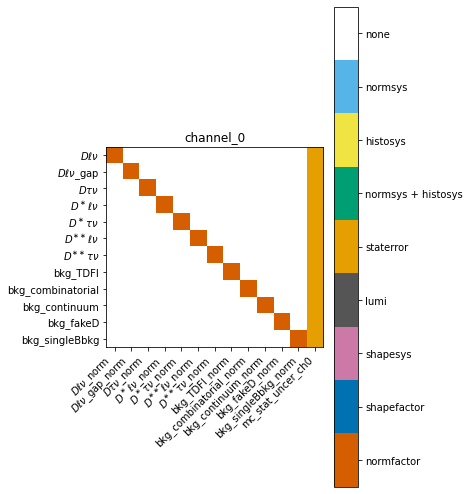

In [9]:
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec_e).model())

In [4]:
model_sr, data_sr = cabinetry.model_utils.model_and_data(spec_e)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_TDFl_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_combinatorial_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_continuum_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_fakeD_

In [6]:
# compare the difference between pyhf suggested_init and cabinetry asimov_parameters

par_val = [2]*12
par_fix = ['bkg_fakeD_norm','bkg_combinatorial_norm','bkg_continuum_norm',
           'bkg_singleBbkg_norm','bkg_TDFl_norm']

# Get norm parameter names in the correct order
norm_parameter_names = [par for par in model_sr.config.par_order if par.endswith('_norm')]
# Create a list of parameter names for samples that are not fixed
minos_parameters = [par for par in norm_parameter_names if par not in par_fix]
# Create a boolean list for fixing parameters
fix_mask = [par in par_fix for par in norm_parameter_names]

# set up the model configuration
for i, par_name in enumerate(norm_parameter_names):
    model_sr.config.par_map[par_name]['paramset'].suggested_init=[par_val[i]]
    model_sr.config.par_map[par_name]['paramset'].suggested_fixed=fix_mask[i]

# print(model_sr.config.suggested_init() )
# print(model_sr.config.suggested_fixed())
print(list(cabinetry.model_utils.asimov_parameters(model_sr))==model_sr.config.suggested_init())

toy_pars = cabinetry.model_utils.asimov_parameters(model_sr)
pdf_toy = model_sr.make_pdf(pyhf.tensorlib.astensor(toy_pars))
toys = pdf_toy.sample((2,))
toys

In [ ]:
%%time
## 200/fb with fakeD from sidebands, binning=50,50
pyhf.set_backend("jax")
fit_results = cabinetry.fit.fit(model=model_sr, data=data_sr,goodness_of_fit=True)

In [20]:
model_sr, data_sr = cabinetry.model_utils.model_and_data(spec_e)
# model_sbFakeD, data_sbFakeD = cabinetry.model_utils.model_and_data(spec_e_sb)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_TDFl_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_combinatorial_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_continuum_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_fakeD_